In [17]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

In [21]:
# get training testing data
df_processed = pd.read_csv("../processed_data/level2_processed_data.csv")
x = ["eth_friction_diff_1.0", "btc_friction_diff_1.0", "eth_close_15_min_past_percent_change"]
y = "btc_close_15_min_future_percent_change"
df = df_processed[[y] + x].dropna()
x_df = df[x]
y_df = pd.DataFrame()
y_df[y] = df[y].apply(lambda x : 1 if x>0 else 0)
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df,
                                   random_state=100, 
                                   test_size=0.2, 
                                   shuffle=True)

In [22]:
# fit model
model = LogisticRegression()
model.fit(x_train, y_train[y])

LogisticRegression()

In [23]:
# predict on validation set
y_hat = model.predict(x_test)

Text(0.5, 1.0, 'Accuracy Score: 0.5373134328358209')

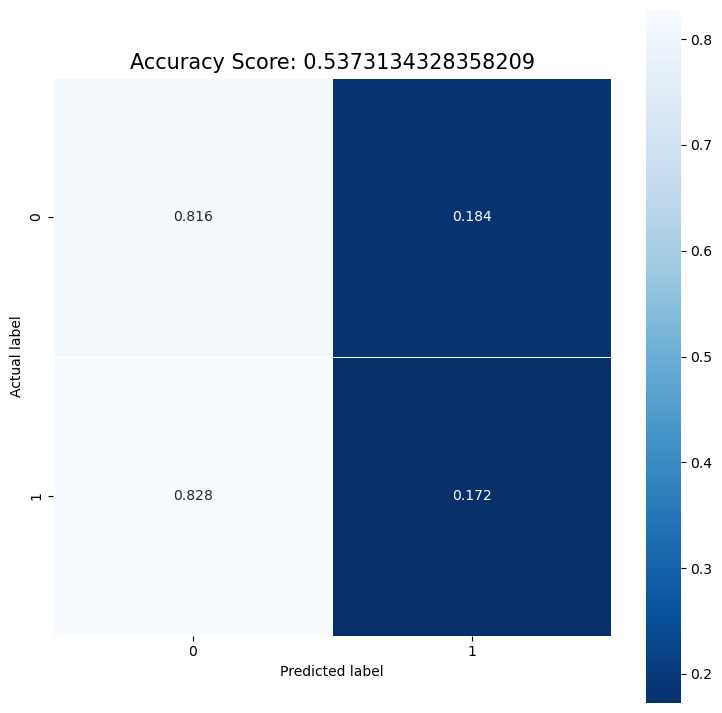

In [24]:
# show accuracy on test
score = model.score(x_test, y_test)
cm = metrics.confusion_matrix(y_test, y_hat, normalize="true")

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)